# Filter Test

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

In [15]:
IMAGE_DIR = "./captured_frames"

GAMMA = 0.5
THRESH_VALUE = 120

image_paths = sorted(glob.glob(os.path.join(IMAGE_DIR, "*.jpg")))
print(f"Found {len(image_paths)} images.")

size = len(image_paths)

Found 8 images.


In [16]:
def show_images(title, images, cols=4, cmap='gray'):
    rows = int(np.ceil(len(images) / cols))
    plt.figure(figsize=(16, rows * 4))
    plt.suptitle(title, fontsize=16)

    for i, (img_title, img) in enumerate(images):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img, cmap=cmap)
        plt.title(img_title)
        plt.axis("off")

    plt.show()

In [17]:
color_images = []
gray_images = []

for path in image_paths:
    img = cv2.imread(path)
    img_color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    filename = os.path.basename(path)

    color_images.append((filename, img_color))
    gray_images.append((filename, img_gray))

print("Loaded", len(color_images), "color images and", len(gray_images), "gray images.")


Loaded 8 color images and 8 gray images.


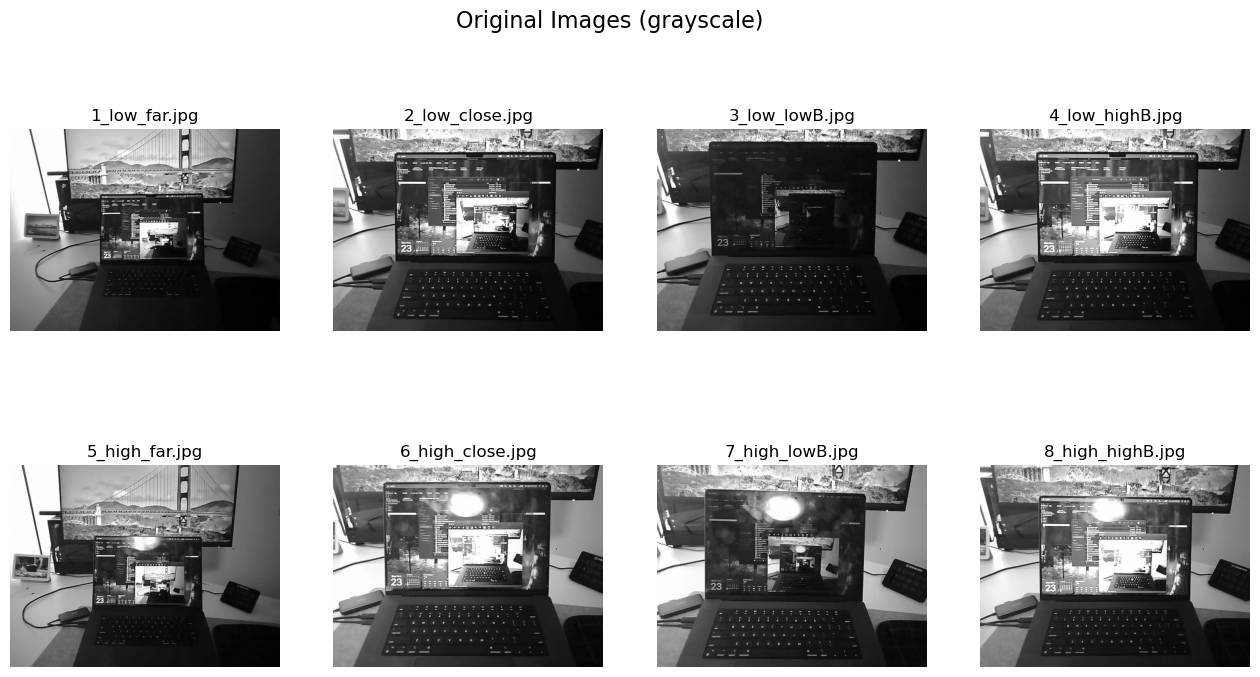

In [18]:
show_images("Original Images (grayscale)", gray_images, cols=4)

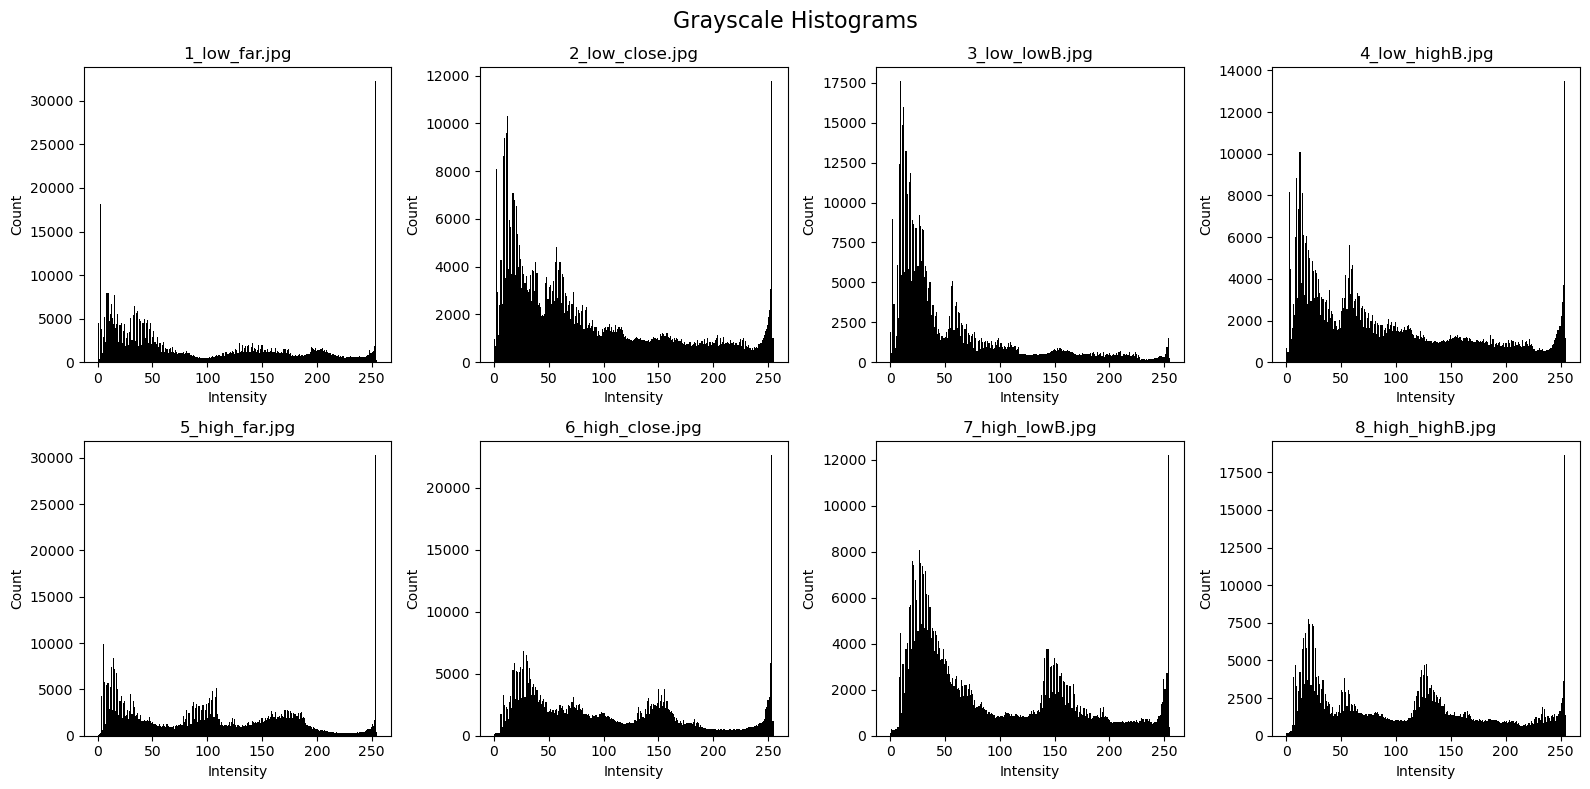

In [19]:
cols = 4
rows = int(np.ceil(len(gray_images) / cols))

plt.figure(figsize=(16, rows * 4))
plt.suptitle("Grayscale Histograms", fontsize=16)

for i, (name, img_gray) in enumerate(gray_images):
    plt.subplot(rows, cols, i + 1)
    plt.hist(img_gray.ravel(), bins=256, range=(0,255), color='black')
    plt.title(name)
    plt.xlabel("Intensity")
    plt.ylabel("Count")
    plt.tight_layout()

plt.show()


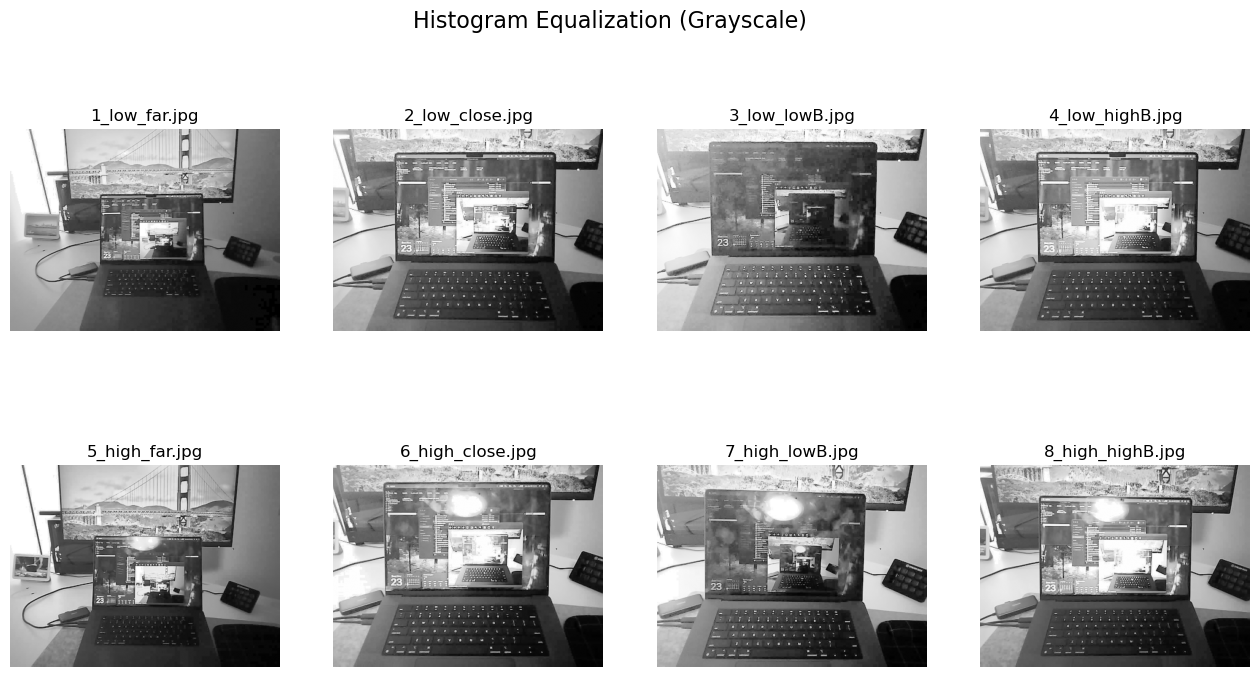

In [20]:
equalized_images = []

for name, img_gray in gray_images:
    eq = cv2.equalizeHist(img_gray)
    equalized_images.append((name, eq))

show_images("Histogram Equalization (Grayscale)", equalized_images, cols=4)


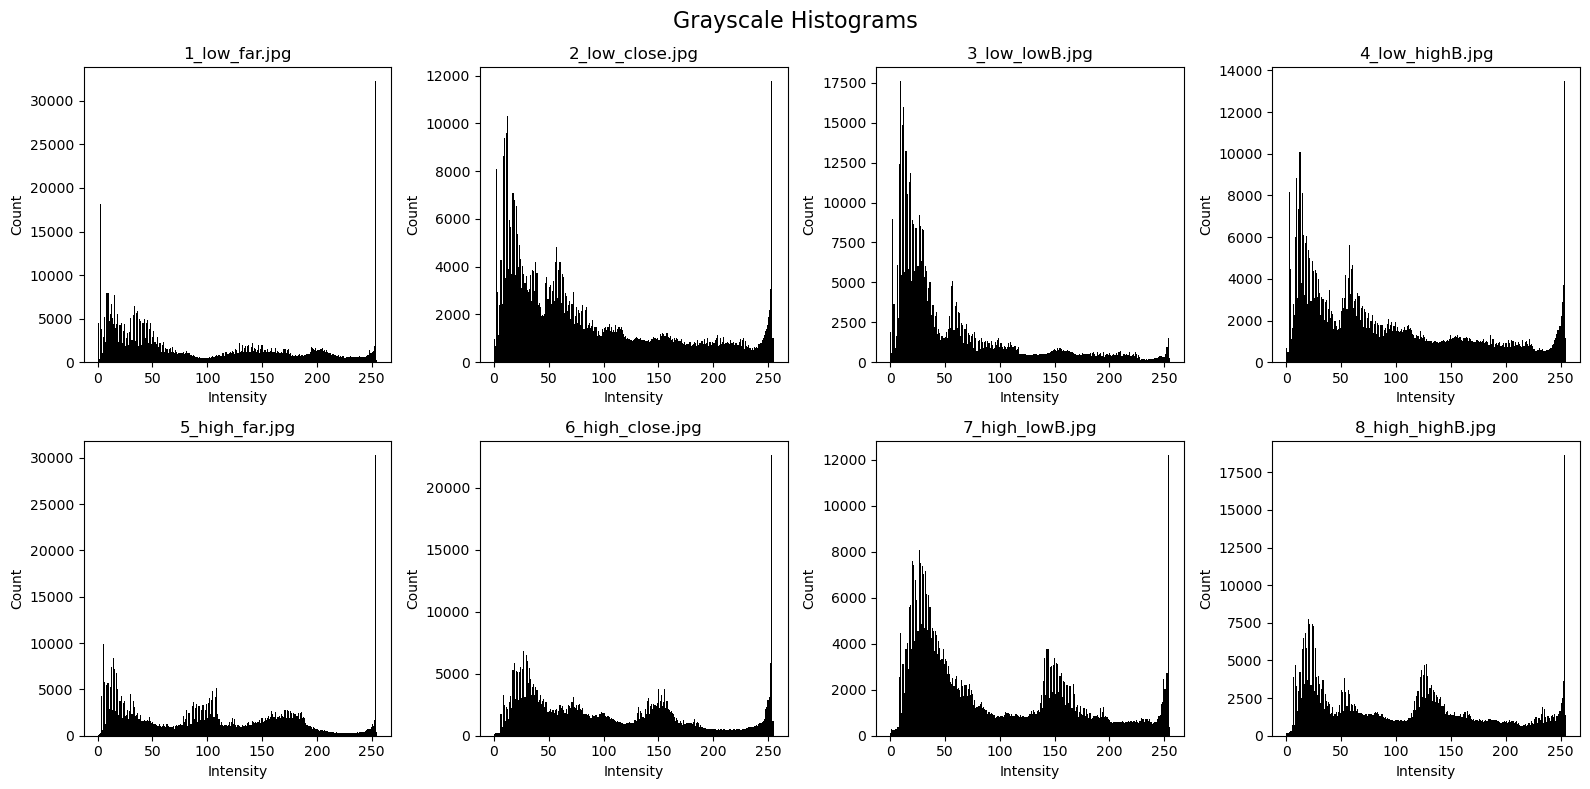

In [21]:
cols = 4
rows = int(np.ceil(len(equalized_images) / cols))

plt.figure(figsize=(16, rows * 4))
plt.suptitle("Grayscale Histograms", fontsize=16)

for i, (name, img_gray) in enumerate(gray_images):
    plt.subplot(rows, cols, i + 1)
    plt.hist(img_gray.ravel(), bins=256, range=(0,255), color='black')
    plt.title(name)
    plt.xlabel("Intensity")
    plt.ylabel("Count")
    plt.tight_layout()

plt.show()


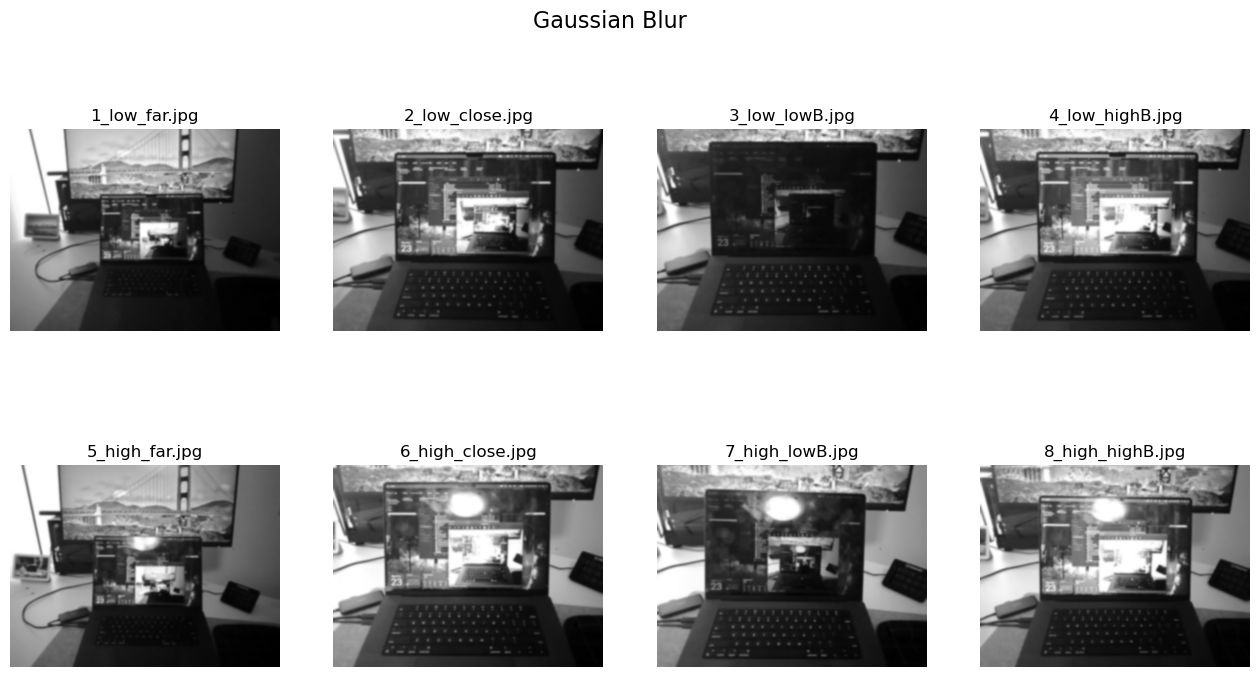

In [22]:
gaussian_images = []

for name, img in gray_images:
    blurred = cv2.GaussianBlur(img, (15, 15), 0)
    gaussian_images.append((name, blurred))

show_images("Gaussian Blur", gaussian_images, cols=4)

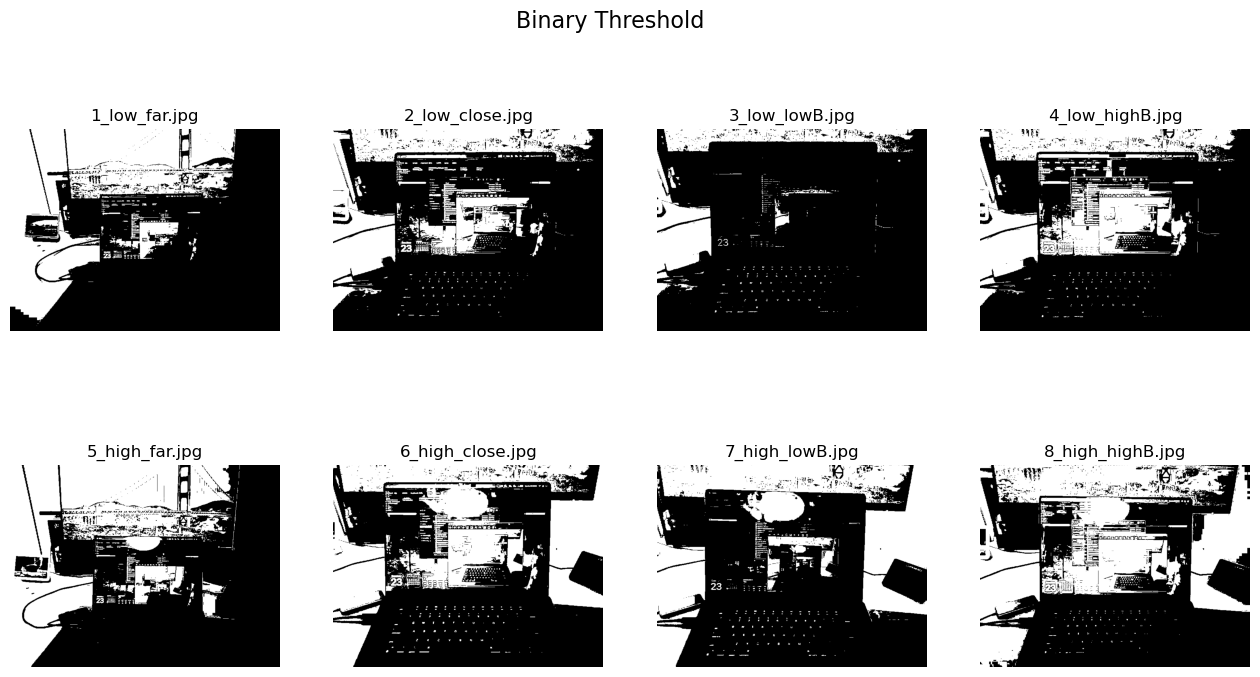

In [23]:
binary_images = []

for name, img in gray_images:
    _, binary = cv2.threshold(img, THRESH_VALUE, 255, cv2.THRESH_BINARY)
    binary_images.append((name, binary))

show_images("Binary Threshold", binary_images, cols=4)

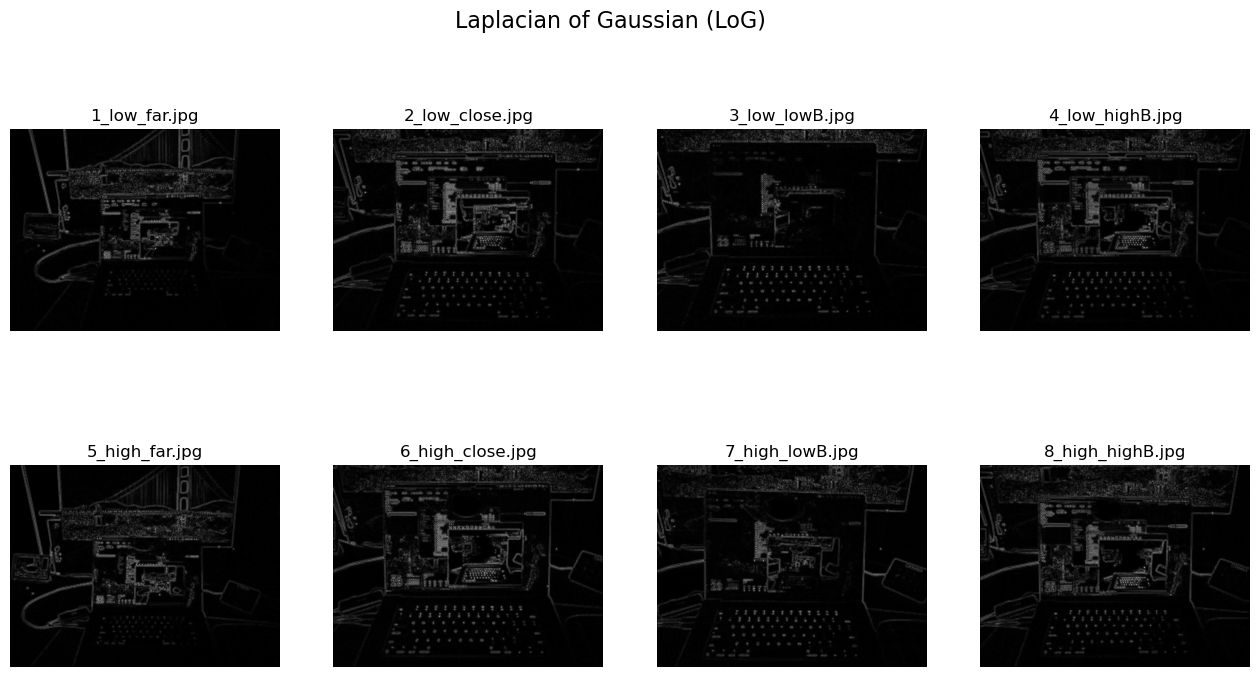

In [24]:
log_images = []

for name, img in gray_images:
    blurred = cv2.GaussianBlur(img, (5, 5), 0)
    log_filtered = cv2.Laplacian(blurred, cv2.CV_64F)
    log_filtered = cv2.convertScaleAbs(log_filtered)
    log_images.append((name, log_filtered))

show_images("Laplacian of Gaussian (LoG)", log_images, cols=4)

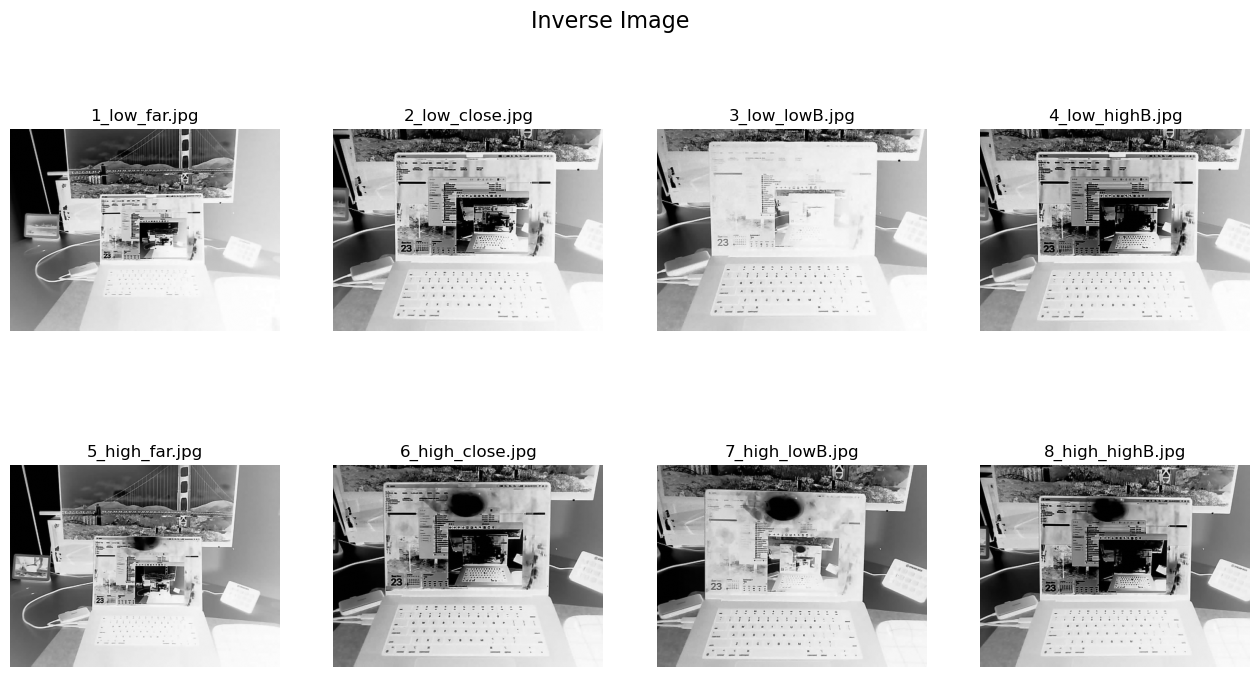

In [25]:
inverse_images = []

for name, img in gray_images:
    inverse = 255 - img
    inverse_images.append((name, inverse))

show_images("Inverse Image", inverse_images, cols=4)

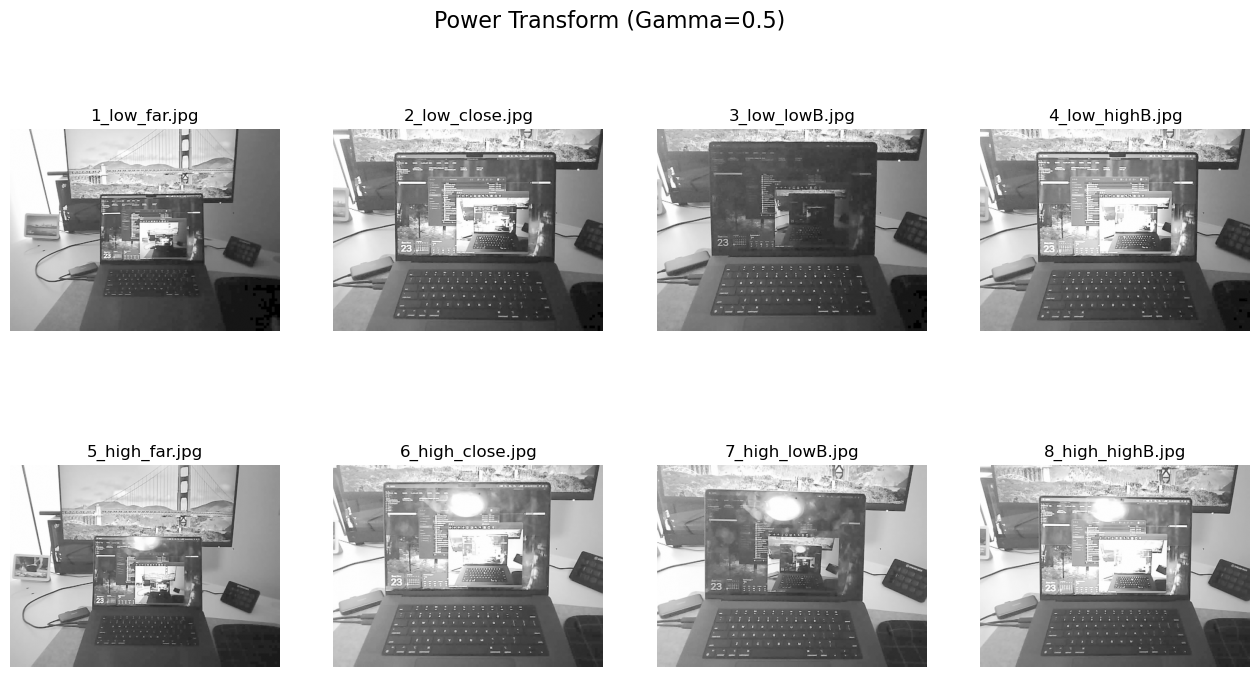

In [26]:
gamma_images = []

for name, img in gray_images:
    gamma_corrected = np.power(img / 255.0, GAMMA) * 255
    gamma_corrected = gamma_corrected.astype(np.uint8)
    gamma_images.append((name, gamma_corrected))

show_images(f"Power Transform (Gamma={GAMMA})", gamma_images, cols=4)